### 1. Insert Sorting

In [8]:
# myList =input('Please input a list needing to be sorted')
# myList=[2,5,8,1,7,6]
import numpy as np
scale_size = 10
myList = np.random.randint(0,scale_size,scale_size)
print(myList)
listLen = len(myList)

def exchangeValue(listIn,id_i,id_j):
    '''Exchange values inside the list between given indexes'''
    temp  = listIn[id_i]
    listIn[id_i] = listIn[id_j]
    listIn[id_j] = temp
#exchangeValue(myList,0,1)

for i in range(1,listLen):
    j = i
    while j > 0:
        if myList[j] < myList[j-1]: # Ascending order
            exchangeValue(myList,j,j-1)
            j-=1
        else:
            j-=1
            break      
print(myList)

[8 0 1 3 1 7 0 3 0 5]
[0 0 0 1 1 3 3 5 7 8]


In [14]:
# This is a more concise version, the number of operations during each loop 
# can be reduced further from last version
scale_size_1 = 10
myList1 = np.random.randint(0,scale_size_1,scale_size_1)
#myList1 = [1, 3, 5, 4, 3]
print(myList1)
listLen = len(myList1)
for i in range(1,listLen):
    j = i
    tempVar = myList1[i]    
    while j > 0 and myList1[j-1] > tempVar: 
    #as long as a_j-1 > a_j (local descending order), exchange should happen
        myList1[j] = myList1[j-1]
        j-=1
    myList1[j] = tempVar
print(myList1)

[1, 3, 5, 4, 3]
[1, 3, 3, 4, 5]


### 2. Merge Sort

In [10]:
def mergeSort(myList):
    '''Sort list with ascending order using merging sort algorithm'''
    from math import floor as flr
    import numpy as np
    N =  len(myList)
    if N==1 :
        return myList
    else:
        # Divide into two parts
        subList_1 = myList[0:flr(N/2)]
        subList_2 = myList[flr(N/2):N]
        # Recursion to sort sublists
        mergeSort(subList_1)
        mergeSort(subList_2)
        # Merge two sublists
        pointer_1 = 0
        pointer_2 = 0
        max_max = max(subList_1[-1],subList_2[-1]) + 1.0
        for i in range(N):
            # set pointer for sublist 1
            if pointer_1 < len(subList_1):
                value_1 = subList_1[pointer_1]
            else:
                value_1 = max_max
            # set pointer for sublist 2
            if pointer_2 < len(subList_2):
                value_2 = subList_2[pointer_2]
            else:
                value_2 = max_max
            myList[i]=min(value_1,value_2)
            # Move pointer based on sorted sublists
            if value_1 < value_2:
                pointer_1+=1
            else:
                pointer_2+=1
        return myList

import numpy as np
scale_size_1 = 10
myList1 = list(np.random.randint(0,scale_size_1,scale_size_1))
#myList1 = [7,5,3,1,6,3,6,4,2,3]
print(myList1)
mergeSort(myList1)
print(myList1)

[1, 6, 1, 4, 2, 0, 6, 8, 2, 1]
[0, 1, 1, 1, 2, 2, 4, 6, 6, 8]


### 3. Selection Sort

In [11]:
def selectSort(myList):
    '''Sort list with ascending order using selection sort algorithm'''
    N = len(myList)
    for i in range(0,N-1,1):
        min_value = myList[i]
        label = i
        for j in range(i+1,N,1):
            # Always to find the minimum value from the whole list
            if myList[j] < min_value:
                min_value = myList[j]
                label = j
        if i!= label : #minimum of this search doesn't happen at initial value
            # exchange should happen between i th and j th element
            temp = myList[i]
            myList[i] = myList[label]
            myList[label] = temp
    return myList

import numpy as np
scale_size_1 = 10
myList2 = list(np.random.randint(0,scale_size_1,scale_size_1))
#myList2 = [7,5,3,1,6,3,6,4,2,3]
print(myList2)
selectSort(myList2)
print(myList2)

[9, 8, 0, 5, 2, 7, 1, 5, 5, 2]
[0, 1, 2, 2, 5, 5, 5, 7, 8, 9]


### Test performance of different sorting algorithms

In [5]:
#from SortAlgorithm import insertSort
#from SortAlgorithm import mergeSort
from SortAlgorithm.speedTest import insertTest
from SortAlgorithm.speedTest import mergeTest
from SortAlgorithm.speedTest import selectTest

import numpy as np
import timeit
import time

scale_series = list(range(100,2100,100))
time_insert = np.zeros(len(scale_series))
time_merge = np.zeros(len(scale_series))
time_select = np.zeros(len(scale_series))

for k in range(len(scale_series)):
    scale_size = scale_series[k]
    # Run test for insert sorting
    tic =  time.time()
    for i in range(100): # Run for 100 times and then take average
        insertTest(scale_size)
    toc = time.time()
    time_insert[k]=(toc-tic)/100
    
    # Run test for merge sorting
    tic =  time.time()
    for i in range(100): # Run for 100 times and then take average
        mergeTest(scale_size)
    toc = time.time()
    time_merge[k]=(toc-tic)/100   
    
        # Run test for select sorting
    tic =  time.time()
    for i in range(100): # Run for 100 times and then take average
        selectTest(scale_size)
    toc = time.time()
    time_select[k]=(toc-tic)/100   
    #print('%20.18f' %(toc-tic))
    
print(time_merge)
print(time_insert)
print(time_select)

[ 0.00108341  0.00278199  0.00430951  0.00690244  0.00623256  0.00944347
  0.00997387  0.01024776  0.01149876  0.01321489  0.01674103  0.0174139
  0.0175311   0.02016327  0.02085985  0.02205489  0.02580013  0.02806757
  0.02496762  0.02628511]
[ 0.00063103  0.00213619  0.00391157  0.00788808  0.01270485  0.02039316
  0.02871607  0.03374434  0.04301412  0.05442077  0.07267255  0.08734477
  0.10851418  0.11680085  0.13524258  0.15144268  0.18692545  0.1843688
  0.20334705  0.23447951]
[ 0.0002995   0.00107578  0.0025675   0.00532967  0.00739662  0.01230341
  0.01465071  0.0191607   0.0239071   0.02941656  0.04182538  0.0539045
  0.05116144  0.06380076  0.07173661  0.07847472  0.08947629  0.09471954
  0.10709244  0.11757914]


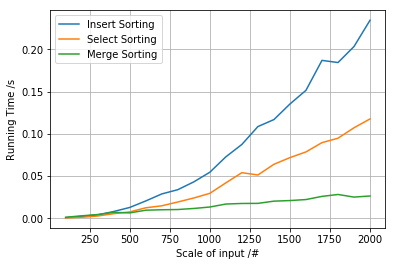

In [7]:
import matplotlib.pyplot as plt
line1, = plt.plot(scale_series,time_insert, label="Insert Sorting", linestyle='-')
line2, = plt.plot(scale_series,time_select, label="Select Sorting", linestyle='-')
line3, = plt.plot(scale_series,time_merge, label="Merge Sorting", linestyle='-')
# Create a legend for two lines
first_legend = plt.legend(handles=[line1, line2,line3], loc=0)
plt.xlabel('Scale of input /#')
plt.ylabel('Running Time /s')
plt.grid(b=True)
plt.show()